DATA SCIENTIST CAPSTONE PROJECT - ANALYSIS

In this part there is a Analysis of the behaviour of the Supply to Line process focus on the Destination Points called PLP

Different Statistics and Grafics are done in order to understand how is the nowadays process.

Process: The production line has several consumption point, also known as PLP. Each consumption point is associated with one material id, a quantity per container and layout location.
When a new container or material is required, an operator makes a request that is registered in the system.
The registers of the material requests is the dataframe analysed.

In [1]:
# Import libraries

import sys
import pandas as pd
import numpy as np

import sqlite3

import matplotlib.pyplot as plt

LOAD Data from Database

The database is based in sql lite. This database is generated in the Python script Data_Scientist_Capstone_1_Prepare_and_Clean_Data.jpynb

In [2]:
# -----------------------------
# 1. Load Data from SQLite
# -----------------------------
def load_data_from_sqlite(db_name: str, table_name: str) -> pd.DataFrame:
    """
    Load data from a SQLite database table into a pandas DataFrame.

    Args:
        db_name (str): Name of the SQLite database file.
        table_name (str): Name of the table to load.

    Returns:
        pd.DataFrame: DataFrame containing the table data.
    """
    conn = sqlite3.connect(db_name)
    df = pd.read_sql(f"SELECT * FROM {table_name}", conn)
    conn.close()
    return df


Filter Data

In order to analyse step by step, it is necessary to filter the data into different deeps

In [3]:
# -----------------------------
# 2. Filter Data
# -----------------------------
def filter_by_column(df: pd.DataFrame, column: str, values: list) -> pd.DataFrame:
    """
    Filter a DataFrame by matching values in a specific column.

    Args:
        df (pd.DataFrame): Input DataFrame.
        column (str): Column name to filter on.
        values (list): List of values to keep.

    Returns:
        pd.DataFrame: Filtered DataFrame.
    """
    return df[df[column].isin(values)]


Statistics

For each data filter, it is necessary to make some statistics in order to validate it 

In [4]:
# -----------------------------
# 3. Compute Statistics
# -----------------------------
def compute_stats(df: pd.DataFrame, group_cols: list, target_col: str) -> pd.DataFrame:
    """
    Compute median, std, min, and max for a target column grouped by specified columns.

    Args:
        df (pd.DataFrame): Input DataFrame.
        group_cols (list): Columns to group by.
        target_col (str): Column to compute statistics on.

    Returns:
        pd.DataFrame: DataFrame with computed statistics.
    """
    return df.groupby(group_cols)[target_col].agg(
        median='median',
        std='std',
        min='min',
        max='max'
    ).reset_index()


Visual Analysis

In order to validate or the analysis and get conclusions, some Visuals are needed

In [5]:
# -----------------------------
# 4. Plot Histogram
# -----------------------------
def plot_histogram(data, title: str, xlabel: str, ylabel: str, bins: int = 10):
    """
    Plot a histogram for the given data.

    Args:
        data (array-like): Data to plot.
        title (str): Title of the plot.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        bins (int): Number of bins in the histogram.
    """
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=bins, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(axis='y', alpha=0.75)
    plt.show()


Save Data to Excel

Some parts of the data are required to save in Excel files, in order to share with other partners

In [6]:
# -----------------------------
# 5. Save to Excel
# -----------------------------
def save_to_excel(df: pd.DataFrame, filename: str):
    """
    Save a DataFrame to an Excel file.

    Args:
        df (pd.DataFrame): DataFrame to save.
        filename (str): Output Excel file name.
    """
    df.to_excel(filename, index=False)


Analysis workflow

First Step is to get some statistics with different deepth of Data

1- Statistics and Visuals for all PLP Data
2- Statistics and Visuals only for MVP (Most Value Product) PLP Data. This is a list of concret PLPs
3- Statistics and Visuals only for one PLP

Data loaded successfully.
All PLP Statistics:             PLP          Material    median       std       min        max
0    08AI_A07P2      W05FF817157A  1.995833  0.911239  1.046389   4.535278
1    08AI_A07P3  W05WA035507M 041  1.821389  0.888795  0.048056   5.131944
2    08AI_A07P4      W05FA817157A  1.899722  1.103405  0.740556   4.218889
3    08AI_A07P5       W05F0867811  1.830833  1.255757  0.648889   6.791667
4    08AI_A07P6      W05FE817157A  2.124167  1.725458  0.843889   7.487222
..          ...               ...       ...       ...       ...        ...
893  10SJ_007P3     W05FA854816AL  1.183056  0.451211  0.420000   2.266389
894  10SK_002P1     W05FA854815AA  1.096806  0.917553  0.416667   6.137500
895  10SK_004P2      W05FF854815G  2.112222  0.922901  0.476667   5.032778
896  10SK_006P3      W05FF854816S  2.885833  1.065145  1.006944   5.921111
897  10SK_008P2     W05FA854816AK  2.138611  0.918776  0.656389  10.373056

[898 rows x 6 columns]


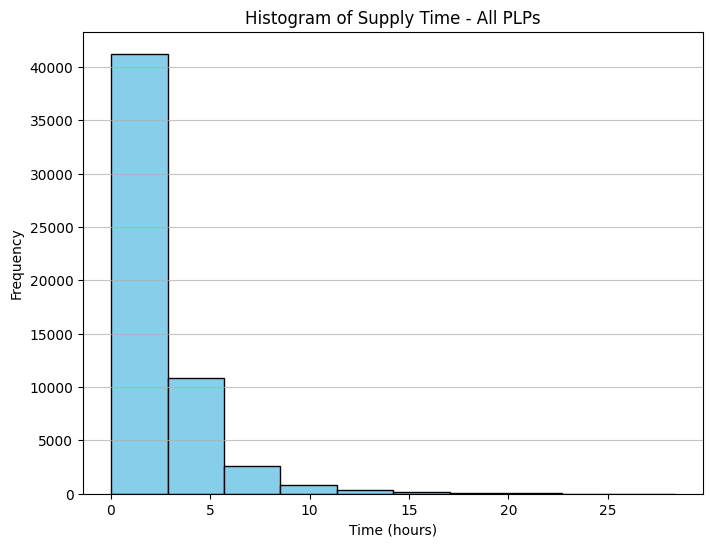

MVP Statistics:           PLP          Material    median       std       min        max
0  10CD_320P1  W05FA863484  4PK  3.739861  1.031468  0.709167   5.412222
1  10CD_322P1  W05FA867766B 4PK  2.122222  2.273237  0.589722  18.982778
2  10CI_319P4  W05FA863483  4PK  3.768611  0.940627  0.950833   6.458889
3  10CI_321P4  W05FA867765B 4PK  2.169167  2.296434  0.466667  14.958611
4  10DD_409P2       W05FA823723  1.480833  0.557584  0.637222   3.124167
5  10SG_016P1  W05FA867601B 4PK  2.100833  1.247709  0.499167   8.416111


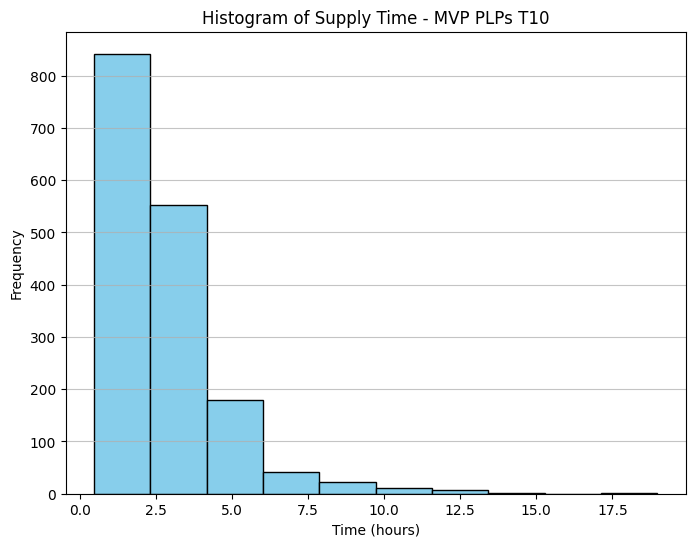

MVP 10DD_409P2 Statistics:           PLP     Material    median       std       min       max
0  10DD_409P2  W05FA823723  1.480833  0.557584  0.637222  3.124167


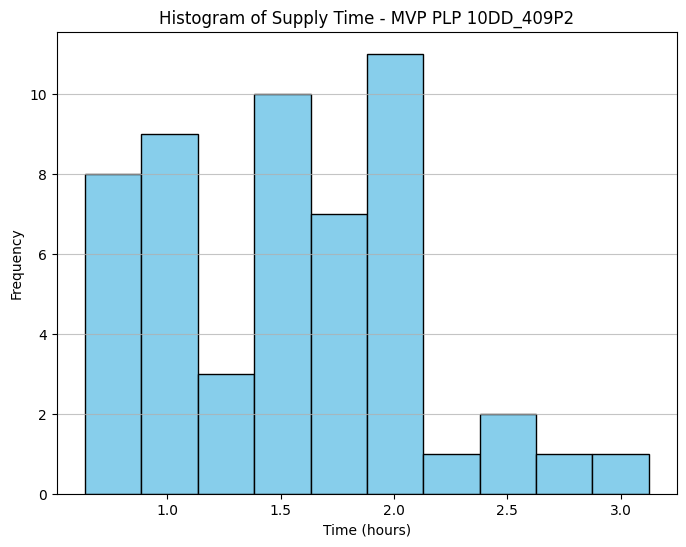

In [16]:
# -----------------------------
# Main Workflow
# -----------------------------
if __name__ == "__main__":
    # Database and table details
    db_name = "SPA_Data_Analytics.db"
    table_name = "SPA_Historic_Manual_Requests"

    # Load data
    df_loaded = load_data_from_sqlite(db_name, table_name)
    print("Data loaded successfully.")
    #print(df_loaded.head())

    # Compute overall stats for Supply_time_hours
    stats_supply = compute_stats(df_loaded, ['PLP', 'Material'], 'Supply_time_hours')
    save_to_excel(stats_supply, 'SPA_Estadisticas_Tiempo_entre_Peticion_y_Entrega.xlsx')
    print("All PLP Statistics:",stats_supply)

    # Plot overall histogram
    plot_histogram(df_loaded['Supply_time_hours'],
                   title='Histogram of Supply Time - All PLPs',
                   xlabel='Time (hours)',
                   ylabel='Frequency')

    # Filter MVP PLPs
    mvp_plps = ['10DD_409P2', '10CI_319P4', '10CD_320P1', '10CI_321P4', '10CD_322P1', '10SG_016P1']
    subset_df = filter_by_column(df_loaded, 'PLP', mvp_plps)

    # Compute stats for MVP PLPs
    stats_mvp = compute_stats(subset_df, ['PLP', 'Material'], 'Supply_time_hours')
    save_to_excel(stats_mvp, 'SPA_Estadisticas_Tiempo_MVPs_T10.xlsx')
    print("MVP Statistics:",stats_mvp)

    # Plot MVP histogram
    plot_histogram(subset_df['Supply_time_hours'],
                   title='Histogram of Supply Time - MVP PLPs T10',
                   xlabel='Time (hours)',
                   ylabel='Frequency')

    # Filter MVP PLP = 10DD_409P2 Only one PLP
    mvp_plp_only_one = ['10DD_409P2']
    subset_df_only_one = filter_by_column(df_loaded, 'PLP', mvp_plp_only_one)

    # Compute stats for MVP PLPs
    stats_mvp_only_one = compute_stats(subset_df_only_one, ['PLP', 'Material'], 'Supply_time_hours')
    save_to_excel(stats_mvp_only_one, 'SPA_Estadisticas_Tiempo_MVP_10DD_409P2.xlsx')
    print("MVP 10DD_409P2 Statistics:",stats_mvp_only_one)

    # Plot MVP histogram
    plot_histogram(subset_df_only_one['Supply_time_hours'],
                   title='Histogram of Supply Time - MVP PLP 10DD_409P2',
                   xlabel='Time (hours)',
                   ylabel='Frequency')
    



Conclusions of Supply Time:
- Although the Standard Supply Time is predefined as 2.5 hours, we see that there is a big dispersion when we compare all the PLPs
- When a subset of data is done, MVPs, the value is closer to the predefined 2.5 hours for Supply Time. This is because this MVPs are very stable from the process.
- When I focus in one PLP (consumption point) we see that the behaviour is not as expected.
- All PLPs have different characteristics: Their behaviour is not exactly the same. It would be necessary to group them and analyse in deep detail what are the causes of this behaviour.




All PLP Statistics:             PLP          Material     median        std        min        max
0    08AI_A07P2      W05FF817157A  15.745833  13.421576  10.369444  67.745833
1    08AI_A07P3  W05WA035507M 041  11.056111  11.976031   0.000000  61.420833
2    08AI_A07P4      W05FA817157A  28.173333  25.406023   8.318889  96.446944
3    08AI_A07P5       W05F0867811  11.139444  13.120798   1.540000  65.399722
4    08AI_A07P6      W05FE817157A  22.511944  16.309980  14.974722  72.521944
..          ...               ...        ...        ...        ...        ...
893  10SJ_007P3     W05FA854816AL  12.126667  12.787887   5.137222  62.561667
894  10SK_002P1     W05FA854815AA  12.090833  13.055133   2.263889  63.594722
895  10SK_004P2      W05FF854815G   1.966389   5.301915   0.004444  50.817778
896  10SK_006P3      W05FF854816S   2.765278   6.042616   0.386111  53.618611
897  10SK_008P2     W05FA854816AK   1.939722   5.117447   0.016667  53.581111

[898 rows x 6 columns]


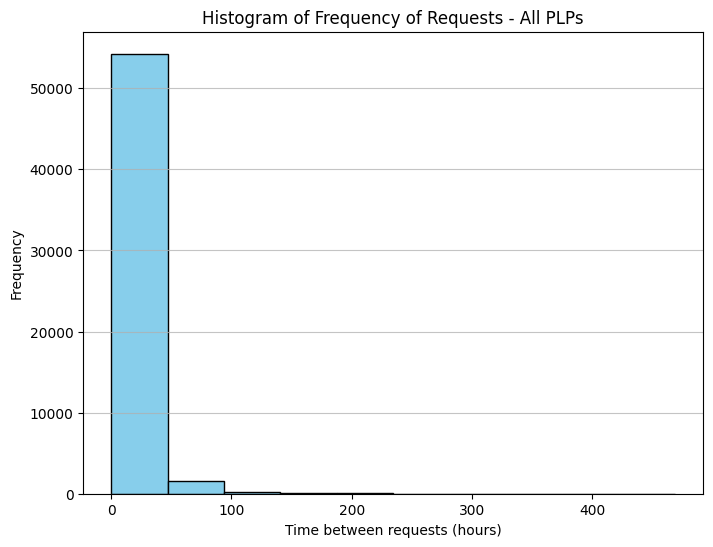

MVP PLP Statistics:           PLP          Material    median        std       min        max
0  10CD_320P1  W05FA863484  4PK  3.640278   7.147753  0.619444  54.799722
1  10CD_322P1  W05FA867766B 4PK  1.051944   3.751344  0.002778  51.524722
2  10CI_319P4  W05FA863483  4PK  3.588194   7.099388  0.003889  55.175556
3  10CI_321P4  W05FA867765B 4PK  1.016944   3.735742  0.000000  51.797778
4  10DD_409P2       W05FA823723  9.431111  10.468488  6.494444  58.729722
5  10SG_016P1  W05FA867601B 4PK  1.035278   3.735276  0.000000  51.568889


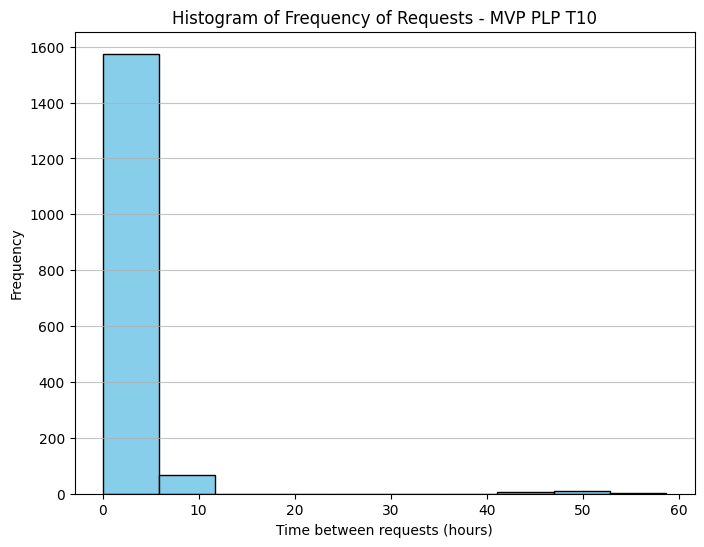

MVP PLP Statistics:           PLP     Material    median        std       min        max
0  10DD_409P2  W05FA823723  9.431111  10.468488  6.494444  58.729722


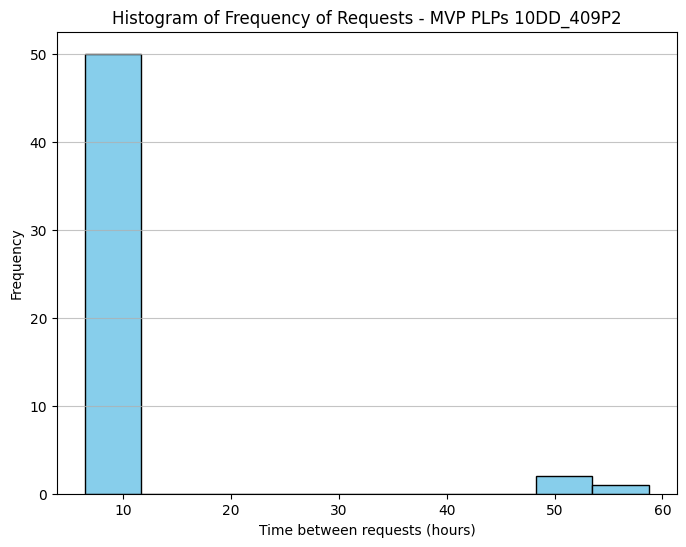

In [18]:
    # Repeat for time_between_MatReqs
    stats_requests = compute_stats(df_loaded, ['PLP', 'Material'], 'time_between_MatReqs')
    save_to_excel(stats_requests, 'SPA_Estadisticas_Frecuencia_Peticiones.xlsx')
    print("All PLP Statistics:",stats_requests)

    plot_histogram(df_loaded['time_between_MatReqs'],
                   title='Histogram of Frequency of Requests - All PLPs',
                   xlabel='Time between requests (hours)',
                   ylabel='Frequency')

    stats_requests_mvp = compute_stats(subset_df, ['PLP', 'Material'], 'time_between_MatReqs')
    save_to_excel(stats_requests_mvp, 'SPA_Estadisticas_Frecuencia_Peticiones_MVP.xlsx')
    print("MVP PLP Statistics:",stats_requests_mvp)

    plot_histogram(subset_df['time_between_MatReqs'],
                   title='Histogram of Frequency of Requests - MVP PLP T10',
                   xlabel='Time between requests (hours)',
                   ylabel='Frequency')

    stats_requests_only_one = compute_stats(subset_df_only_one, ['PLP', 'Material'], 'time_between_MatReqs')
    save_to_excel(stats_requests_only_one, 'SPA_Estadisticas_Frecuencia_Peticiones_MVP.xlsx')
    print("MVP PLP Statistics:",stats_requests_only_one)

    plot_histogram(subset_df_only_one['time_between_MatReqs'],
                   title='Histogram of Frequency of Requests - MVP PLPs 10DD_409P2',
                   xlabel='Time between requests (hours)',
                   ylabel='Frequency')

Conclusions of Time between Requests:
- In this case there is no standard Time Between Requests. Every material has its own atributes, for example the quantity on each container and the number of parts need for every product.
- The statistics shown by all PLPs (consumption point) are very dispersive.
- When a subset of data is done, MVPs, the value of Time between Requests is also variable depending on the PLP. 
- When I focus in one PLP (consumption point) we see that the value is stable except for some cases that is very high.
- Like the previous variable analysed Supply Time, all PLPs have different characteristics: Their behaviour is not exactly the same. It would be necessary to group them and analyse in deep detail what are the causes of this behaviour.